In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, re, glob
from sklearn.preprocessing import LabelEncoder
from collections import Counter
#from googletrans import Translator
import numpy as np
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

        category_id
count  15188.000000
mean       9.676916
std        5.570972
min        0.000000
25%        4.000000
50%       10.000000
75%       14.000000
max       20.000000


<ipython-input-2-87254f360c44>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_class.Toplam,rug = True, kde_kws={"color": "k"}, hist_kws={"color" : "r"});


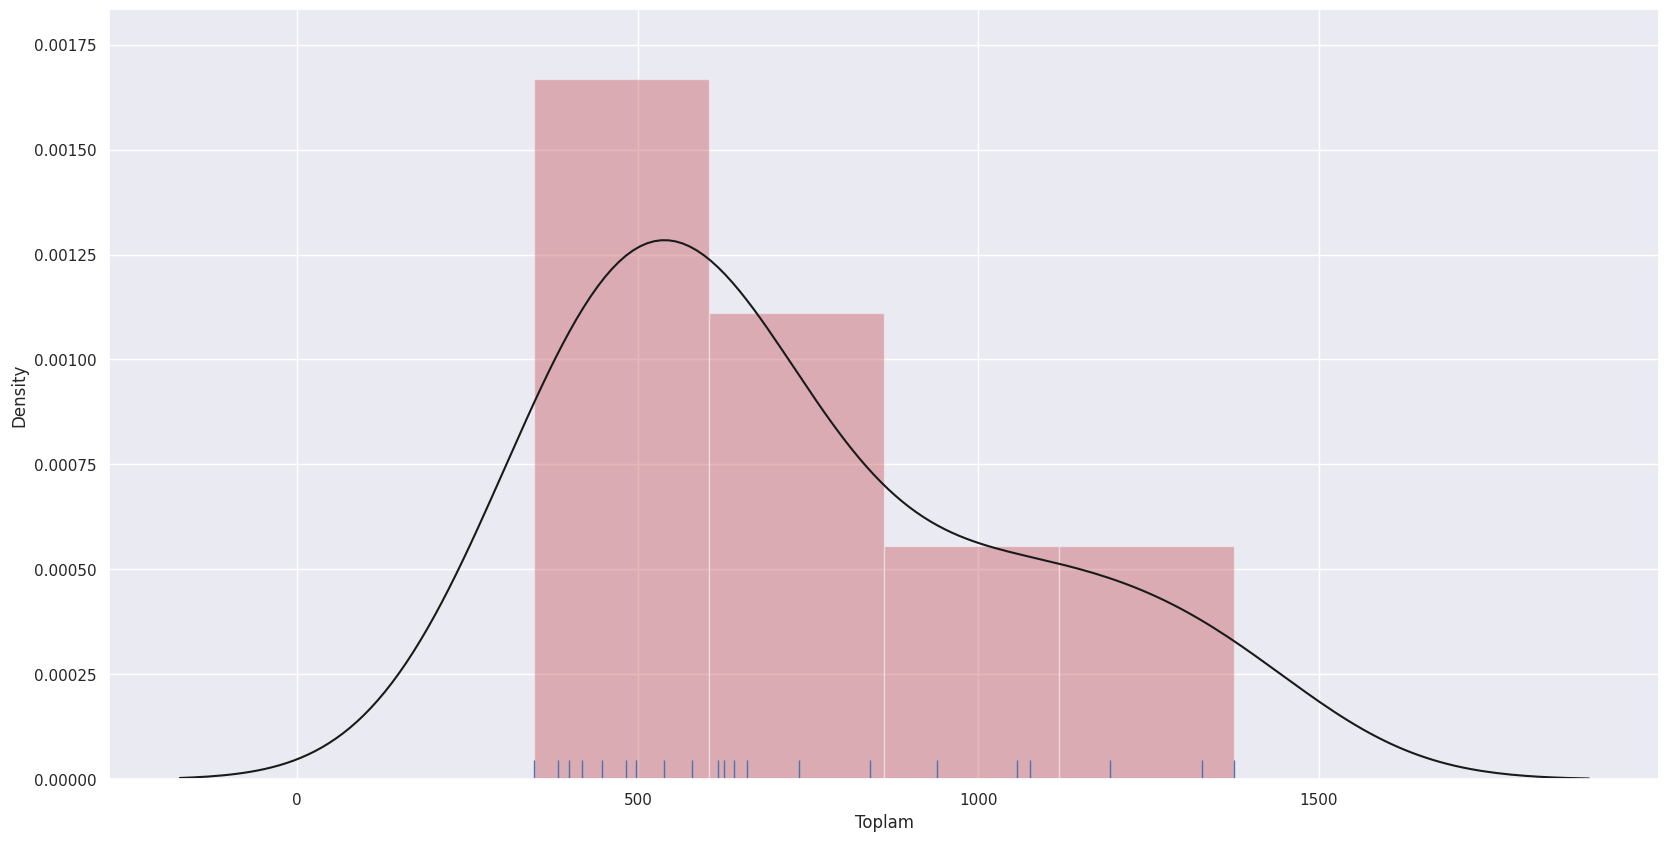

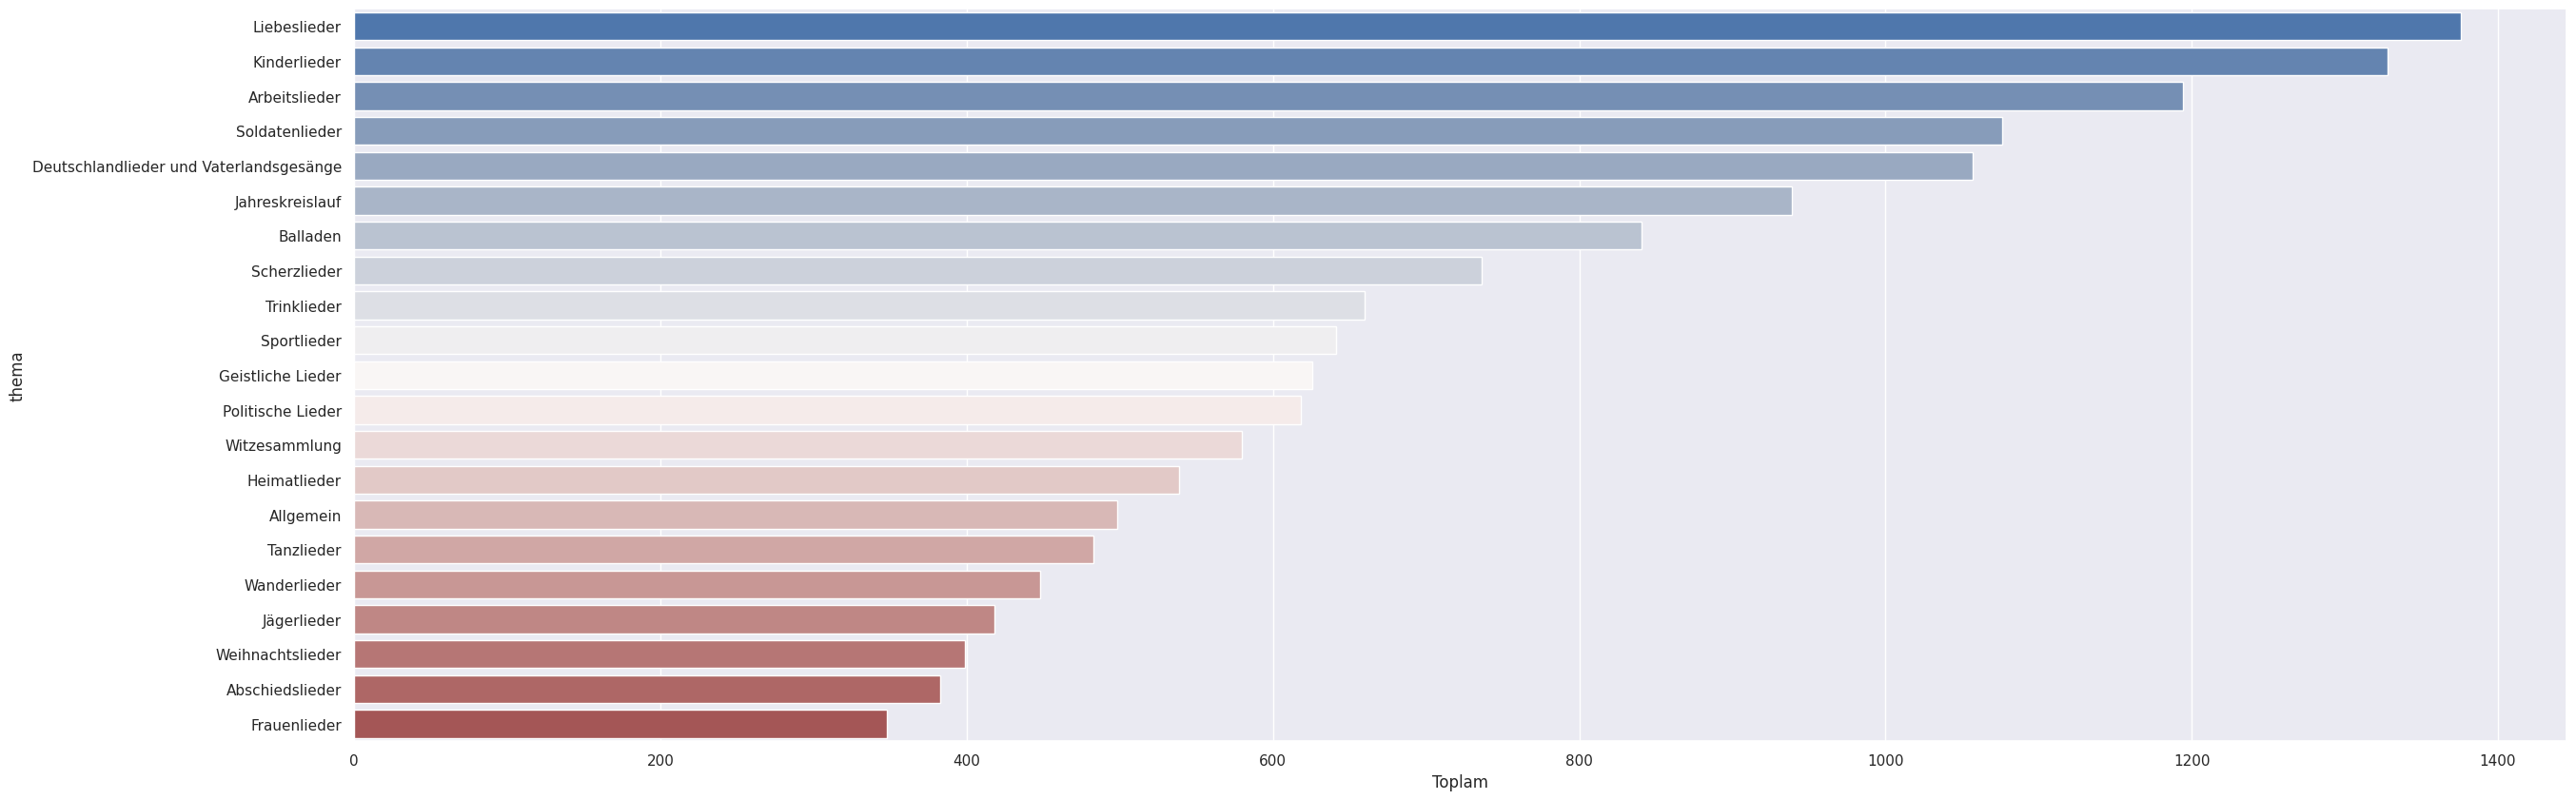

In [ ]:

dataset = pd.read_excel('results.xlsx')
print(dataset.describe())
sum_ = Counter(dataset['thema']).values()
class_ = Counter(dataset['thema']).keys()
df_class = pd.DataFrame(zip(class_,sum_), columns = ['thema', 'Toplam'])
df_class=df_class.dropna()
plt.figure(figsize=(20,10))
sns.set(color_codes=True)
sns.distplot(df_class.Toplam,rug = True, kde_kws={"color": "k"}, hist_kws={"color" : "r"});
plt.savefig('themalar.png')
plt.figure(figsize=(30,10))
sns.set(color_codes=True)
#sns.lineplot(x = "thema", y = "Toplam", data = df_class);
sns.barplot(y = df_class.thema, x= df_class.Toplam, palette='vlag', orient="h",order=df_class.sort_values('Toplam',ascending = False).thema)
#plt.xticks(rotation=45)
plt.savefig('sınıfdagılım.png')
#dataset.to_excel('./data.xlsx')
dataset=pd.DataFrame(dataset)
df=dataset.dropna()


In [ ]:
df.thema.value_counts()

Liebeslieder                               1376
Kinderlieder                               1328
Arbeitslieder                              1194
Soldatenlieder                             1076
Deutschlandlieder und Vaterlandsgesänge    1057
Jahreskreislauf                             939
Balladen                                    841
Scherzlieder                                736
Trinklieder                                 660
Sportlieder                                 641
Geistliche Lieder                           626
Politische Lieder                           618
Witzesammlung                               580
Heimatlieder                                539
Allgemein                                   498
Tanzlieder                                  483
Wanderlieder                                448
Jägerlieder                                 418
Weihnachtslieder                            399
Abschiedslieder                             383
Frauenlieder                            

In [ ]:
sub_df=df[df.groupby('thema').thema.transform('count')>100].copy()

In [ ]:
sub_df.thema.value_counts()

NameError: ignored

In [ ]:
len(sub_df.thema.value_counts())

NameError: ignored

In [ ]:
df=sub_df

In [ ]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import string
from nltk.corpus import stopwords
"""
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: re.sub("„", '', x))
df['text'] = df['text'].apply(lambda x: re.sub('“', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(',', '', x))
df['text'] = df['text'].replace('\n','')
df['text'] = df['text'].apply(lambda x: re.sub("[,'\.„!\s+^A-Za-zÀ-ž<[^>]+>?();:$%&#]", '', x))
df['text'] = df['text'].apply(lambda x: x.strip())
df['text'] = df['text'].apply(lambda x: re.sub("[,'\.„!?();:$%&#]", '', x))
df['text'] = df['text'].apply(lambda x: re.sub("[0123456789]", '', x))
"""
nltk.download('stopwords')
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('german')

def stopword_extraction(values):
    wordFilter = [word for word in values.split() if word not in stop_word_list]
    notStopword = " ".join(wordFilter)
    return notStopword
"""
df['text'] = df['text'].apply(lambda x: stopword_extraction(x))
"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


" \ndf['text'] = df['text'].apply(lambda x: stopword_extraction(x))\n"

In [ ]:
labelencoder = LabelEncoder()
df["labels"] = labelencoder.fit_transform(df.thema)

In [ ]:
pip! install gensim
pip! install keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import gensim
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential, load_model



X=df.text
y=df.category_id
X_egitim,X_test, y_egitim, y_test=train_test_split(X,y,test_size=0.2,random_state=28)
X_egitim_dizi=[metin.split() for metin in X_egitim]
maxmesafe=2
minfrekans=1
vektor_boyut =200
w2v_model=gensim.models.Word2Vec(sentences=X_egitim_dizi, vector_size=vektor_boyut, window=maxmesafe,min_count=minfrekans)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_egitim_dizi)
X_egitim_tok=tokenizer.text_to_sequences(X_egitim_dizi)
kelime_index=tokenizer.word_index
maxlen=1000
X_egitim_tok_pad=pad_sequences(X_egitim_tok,maxlen=maxlen)
kelime_sayi=len(kelime_index)+1
model=Sequential()
model.add(Embedding(matris.shape[0],
                    output_dim=matris_shape[1],
                    weights=[matris],
                    input_length=maxlen,
                    trainable=False))
model.add(LSTM(units=32))
model.add(Dense(21,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
model.summary()
model.fit(X_egitim_tok_pad, y_egitim, validation_split=0.2,epochs=30,batch_size=32,  verbose=1)

SyntaxError: ignored

In [ ]:
df.head()

,thema,text,category_id
0,Abschiedslieder,geschieden weilest lassen vermag o lebenslicht...,0
1,Abschiedslieder,leb wohl treues bruderherz leb wohl müssen sch...,0
2,Abschiedslieder,schätzchen reich hand beschluß unterpfand besc...,0
3,Abschiedslieder,morgen schatz verreisen abschied nehmen gewalt...,0
4,Abschiedslieder,winde wehn schiffe gehn weit fremde land´ matr...,0


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3),
                        stop_words=stopwords.words('german'))
# We transform each complaint into a vector
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 15188 complaints is represented by 194549 features (TF-IDF score of unigrams and bigrams)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


X = features # Collection of documents
y = labels # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state = 42)
models = [
        LGBMClassifier(),
        #AdaBoostClassifier(),
        LogisticRegression(C=0.1,penalty="l2",max_iter=250),
        SVC(kernel='linear',C=3),
        GaussianNB(),
        DecisionTreeClassifier(),
       #GradientBoostingClassifier(),
        #KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    #LinearSVC(),
    #MultinomialNB(),
    #LogisticRegression(random_state=0),
]
# 5 Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

                        Mean Accuracy  Standard deviation
model_name                                               
DecisionTreeClassifier       0.810606            0.052831
GaussianNB                   0.830303            0.091914
LGBMClassifier               0.833333            0.078959
LogisticRegression           0.809091            0.076219
RandomForestClassifier       0.846970            0.081356
SVC                          0.821212            0.080415
XGBClassifier                0.830303            0.084803


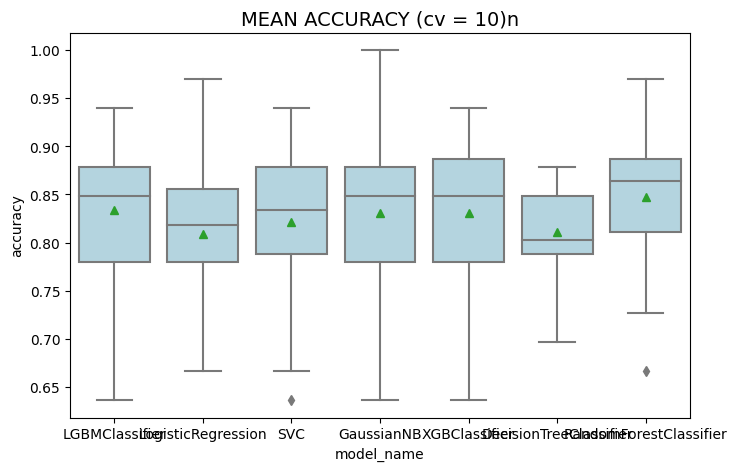

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
print(acc)

#görselleştirme
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 10)n", size=14);

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                               labels,
                                                               df.index, test_size=0.25,
                                                               random_state=42)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
!pip install chart-studio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 83510 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5331, 250)


In [ ]:
Y = pd.get_dummies(df['thema']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5331, 8)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4264, 250) (4264, 8)
(1067, 250) (1067, 8)


In [ ]:

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 50
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/50
120/120 [==============================] - 97s 751ms/step - loss: 1.7693 - accuracy: 0.3818 - val_loss: 1.3997 - val_accuracy: 0.5199
Epoch 2/50
120/120 [==============================] - 81s 672ms/step - loss: 1.0623 - accuracy: 0.6351 - val_loss: 1.1323 - val_accuracy: 0.6370
Epoch 3/50
120/120 [==============================] - 82s 680ms/step - loss: 0.5927 - accuracy: 0.7980 - val_loss: 0.9958 - val_accuracy: 0.6651
Epoch 4/50
120/120 [==============================] - 80s 666ms/step - loss: 0.3050 - accuracy: 0.9051 - val_loss: 1.1269 - val_accuracy: 0.6604
Epoch 5/50
120/120 [==============================] - 80s 667ms/step - loss: 0.1440 - accuracy: 0.9625 - val_loss: 1.1936 - val_accuracy: 0.6674
Epoch 6/50
120/120 [==============================] - 82s 687ms/step - loss: 0.0487 - accuracy: 0.9885 - val_loss: 1.2280 - val_accuracy: 0.6838


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

34/34 [==============================] - 4s 111ms/step - loss: 1.1093 - accuracy: 0.7029
Test set
  Loss: 1.109
  Accuracy: 0.703


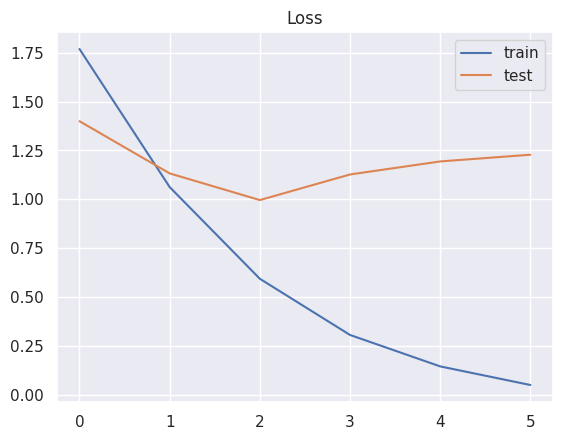

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

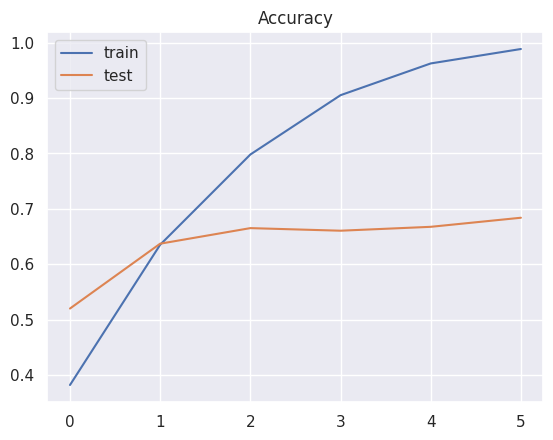

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

DOC2VEC DENEME

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.thema]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.thema]), axis=1)

In [ ]:
train_tagged.values[30]

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

In [ ]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors


In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

In [ ]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

In [ ]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
model_dbow.reset_training(keep_doctags_vectors=True, keep_inference=True)
model_dmm.reset_training(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [ ]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
import nlpaug
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafs

import nlpaug.util.action

In [ ]:
from io import StringIO
col = ['thema', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]
df.columns = ['thema', 'text']
df['category_id'] = df['thema'].factorize()[0]
category_id_df = df[['thema', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'thema']].values)
df.head()


,thema,text,category_id
0,Abschiedslieder,geschieden weilest lassen vermag o lebenslicht...,0
1,Abschiedslieder,leb wohl treues bruderherz leb wohl müssen sch...,0
2,Abschiedslieder,schätzchen reich hand beschluß unterpfand besc...,0
3,Abschiedslieder,morgen schatz verreisen abschied nehmen gewalt...,0
4,Abschiedslieder,winde wehn schiffe gehn weit fremde land´ matr...,0


In [ ]:
df.to_excel('results.xlsx')

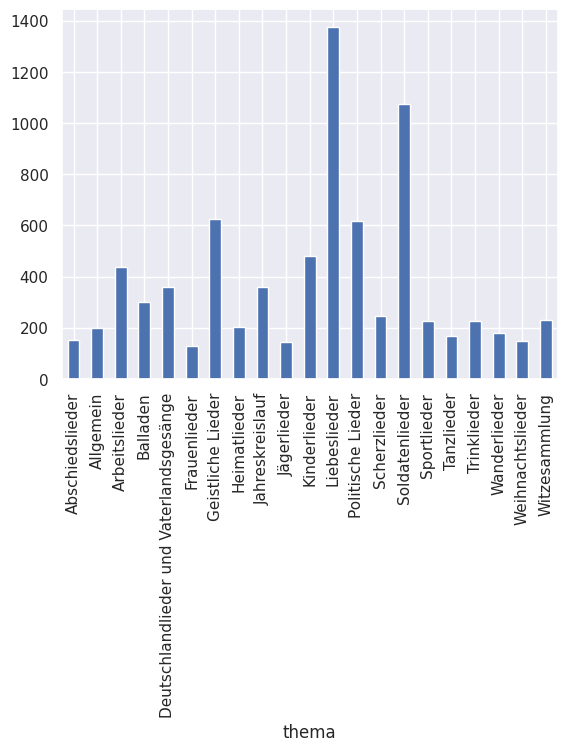

In [ ]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(8,6))
df.groupby('thema').text.count().plot.bar(ylim=0)
plt.show()


In [ ]:
import random
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#train test split
train_data, test_data = train_test_split(df, random_state = 0)
#Read the dataset

train_data.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(5906, 3)

In [ ]:
def textattack_data_augment(data, target, texattack_augmenter):
    aug_data = []
    aug_label = []
    for text, label in zip(data, target):
        if random.randint(0,2) != 1:
            aug_data.append(text)
            aug_label.append(label)
            continue
        aug_list = texattack_augmenter.augment(text)
        aug_data.append(text)
        aug_label.append(label)
        aug_data.extend(aug_list)
        aug_label.extend([label]*len(aug_list))
    return aug_data, aug_label

In [ ]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 73.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.

In [ ]:
from textattack.augmentation import EasyDataAugmenter

embed_aug = EasyDataAugmenter()
aug_data, aug_lable = textattack_data_augment(train_data["text"], train_data["category_id"],embed_aug)



textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


(13832, 90968)

In [ ]:
aug_data_df = pd.DataFrame(list(zip(aug_data, aug_lable)),
               columns =['aug_text', 'aug_lable'])

aug_data_df.to_excel('aug_df.xlsx')

In [ ]:
df=pd.read_excel('aug_df.xlsx')

In [ ]:
aug_data=df.aug_text
count_vect = CountVectorizer()
aug_data_counts = count_vect.fit_transform(aug_data)
aug_data_counts.shape

NameError: ignored

In [ ]:
count_vectorizer = CountVectorizer()
train_vectors_counts = count_vectorizer.fit_transform(train_data["text"])

train_vectors_counts.shape

# Fitting a simple Multinomial Naive Bayes model
mnb = LinearSVC(max_iter=10000)
cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
print("Mean Accuracy: {:.2}".format(cross_val_score(mnb, aug_data_counts, aug_lable, cv=cv).mean()))
